In [1]:
# from https://cospar.readthedocs.io/en/latest/20210121_reprogramming_static_barcoding_v2.html
import cospar as cs
import numpy as np
import anndata as ad

cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/celltagmulti_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/celltagmulti_figure"  # A relative path to save figures. If not existed before, create a new one.

Running cospar 0.4.1 (python 3.9.20) on 2026-01-20 17:11.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
adata_orig = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/celltagging-multi_fibroblast.h5ad")
print(adata_orig)

AnnData object with n_obs × n_vars = 22238 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.0.8', 'seurat_clusters', 'sample', 'replicate', 'predicted.id_cca_co', 'prediction.score.Fib_1_cca_co', 'prediction.score.Fib_0_cca_co', 'prediction.score.Fib_2_cca_co', 'prediction.score.Early_0_cca_co', 'prediction.score.Tran_0_cca_co', 'prediction.score.Tran_1_cca_co', 'prediction.score.Early_1_cca_co', 'prediction.score.Early_2_cca_co', 'prediction.score.iEP_1_cca_co', 'prediction.score.Tran_2_cca_co', 'prediction.score.iEP_2_cca_co', 'prediction.score.Dead.end_1_cca_co', 'prediction.score.Dead.end_0_cca_co', 'prediction.score.iEP_0_cca_co', 'prediction.score.Dead.end_2_cca_co', 'prediction.score.max_cca_co', 'RNA_snn_res.0.2', 'cellranger_ident', 'md_fate_rev1', 'md_fate_coarse_rev1', 'cell_name', 'has_lineage', 'keep', 'time_info'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected'

In [11]:
# Convert the 'time_info' (or 'Time point') column to string type
adata_orig.obs['time_info'] = adata_orig.obs['time_info'].astype(int).astype(str)
adata_orig.obs['md_fate_coarse_rev1'] = adata_orig.obs['md_fate_coarse_rev1'].astype(str)
adata_orig.obs['state_info'] = adata_orig.obs['md_fate_coarse_rev1'].astype(str)

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 22238 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.0.8', 'seurat_clusters', 'sample', 'replicate', 'predicted.id_cca_co', 'prediction.score.Fib_1_cca_co', 'prediction.score.Fib_0_cca_co', 'prediction.score.Fib_2_cca_co', 'prediction.score.Early_0_cca_co', 'prediction.score.Tran_0_cca_co', 'prediction.score.Tran_1_cca_co', 'prediction.score.Early_1_cca_co', 'prediction.score.Early_2_cca_co', 'prediction.score.iEP_1_cca_co', 'prediction.score.Tran_2_cca_co', 'prediction.score.iEP_2_cca_co', 'prediction.score.Dead.end_1_cca_co', 'prediction.score.Dead.end_0_cca_co', 'prediction.score.iEP_0_cca_co', 'prediction.score.Dead.end_2_cca_co', 'prediction.score.max_cca_co', 'RNA_snn_res.0.2', 'cellranger_ident', 'md_fate_rev1', 'md_fate_coarse_rev1', 'cell_name', 'has_lineage', 'keep', 'time_info'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected'

In [12]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Available clusters: ['reprogramming', 'na', 'dead-end']
Available time points: ['3' '12' '21']
Clonal time points: ['3' '12' '21']


In [13]:
adata_orig = cs.pp.initialize_adata_object(adata_orig)

Time points with clonal info: ['12' '21' '3']


In [14]:
cs.hf.update_time_ordering(
    adata_orig, updated_ordering=["3", "12", "21"]
)

In [15]:
adata_orig

AnnData object with n_obs × n_vars = 22238 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.0.8', 'seurat_clusters', 'sample', 'replicate', 'predicted.id_cca_co', 'prediction.score.Fib_1_cca_co', 'prediction.score.Fib_0_cca_co', 'prediction.score.Fib_2_cca_co', 'prediction.score.Early_0_cca_co', 'prediction.score.Tran_0_cca_co', 'prediction.score.Tran_1_cca_co', 'prediction.score.Early_1_cca_co', 'prediction.score.Early_2_cca_co', 'prediction.score.iEP_1_cca_co', 'prediction.score.Tran_2_cca_co', 'prediction.score.iEP_2_cca_co', 'prediction.score.Dead.end_1_cca_co', 'prediction.score.Dead.end_0_cca_co', 'prediction.score.iEP_0_cca_co', 'prediction.score.Dead.end_2_cca_co', 'prediction.score.max_cca_co', 'RNA_snn_res.0.2', 'cellranger_ident', 'md_fate_rev1', 'md_fate_coarse_rev1', 'cell_name', 'has_lineage', 'keep', 'time_info', 'state_info'
    var: 'vst.mean', 'vst.variance', 'vst.vari

In [16]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Available clusters: ['reprogramming', 'na', 'dead-end']
Available time points: ['3' '12' '21']
Clonal time points: ['3' '12' '21']


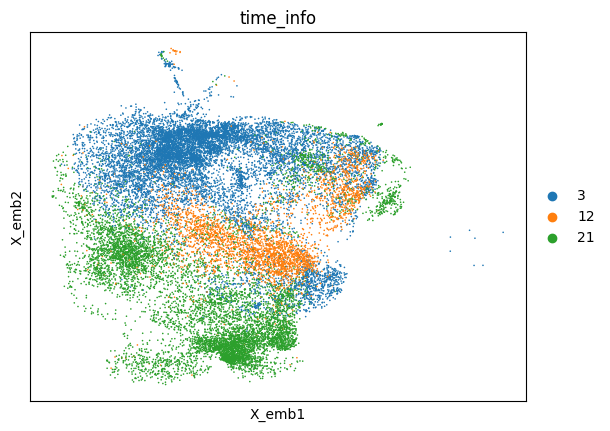

In [17]:
cs.pl.embedding(adata_orig, color="time_info")

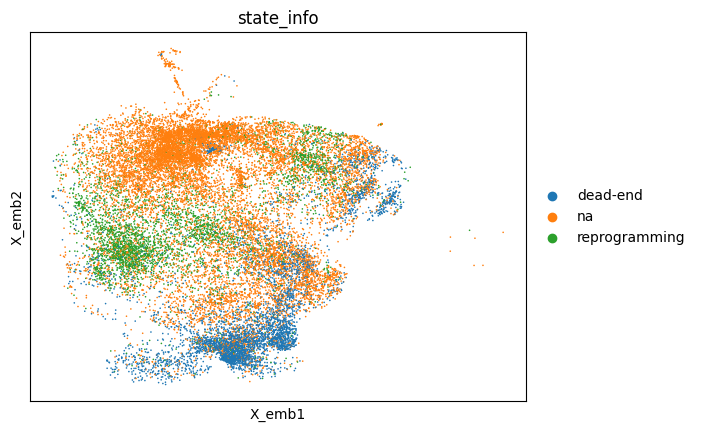

In [18]:
cs.pl.embedding(adata_orig, color="state_info")

100%|██████████| 1367/1367 [00:03<00:00, 405.39it/s]


Data saved at adata.uns['clonal_fate_bias']


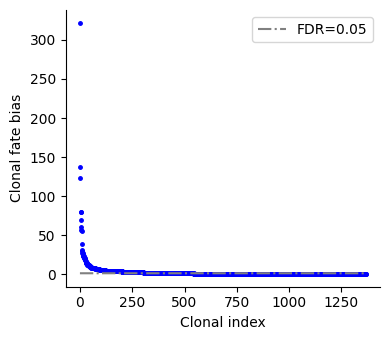

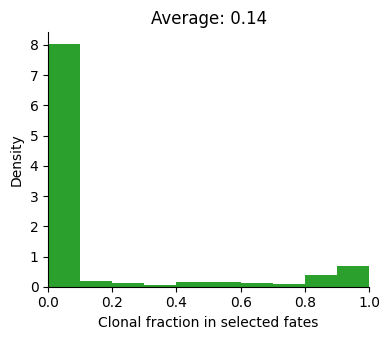

In [20]:
cs.tl.clonal_fate_bias(
    adata_orig, selected_fate="reprogramming", alternative="two-sided"
)
cs.pl.clonal_fate_bias(adata_orig)

In [21]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_orig,
    clonal_time_points=["3", "12"],
    later_time_point="21",
    smooth_array=[15, 10, 5],
    sparsity_threshold=0.2,
    intraclone_threshold=0.2,
)

------Compute the full Similarity matrix if necessary------


/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Smooth round: 1
Smooth round: 2
Smooth round: 3
similarity matrix truncated (Smooth round=3):  11.19513988494873
Smooth round: 4
similarity matrix truncated (Smooth round=4):  10.676636695861816
Smooth round: 5
similarity matrix truncated (Smooth round=5):  11.173829555511475
Smooth round: 6
similarity matrix truncated (Smooth round=6):  11.430910348892212
Smooth round: 7


KeyboardInterrupt: 